In [30]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from 

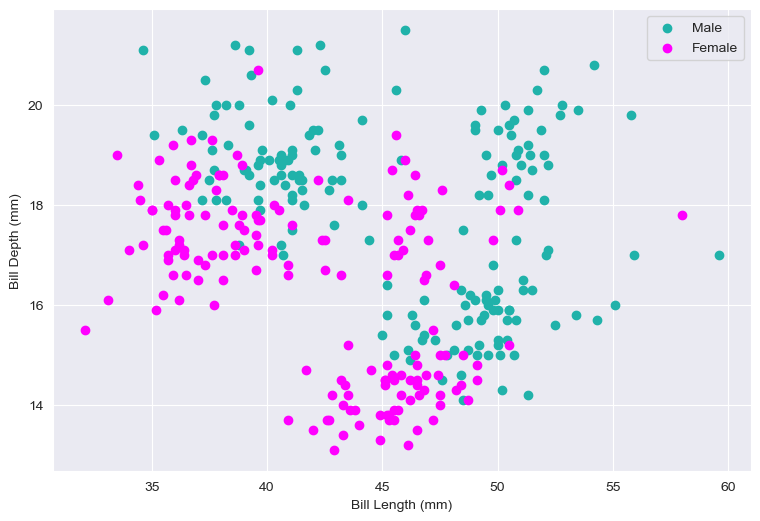

In [32]:
# TODO: Adjust this visualization

penguins = sns.load_dataset('penguins').dropna()

colors = dict(zip(penguins['sex'].unique(),
                  ["lightseagreen", "magenta"]))  # Assign colors to each species for visualization

fig, ax = plt.subplots(figsize=(9, 6))
for s, c in colors.items():
    plot_i = penguins[penguins.sex == s]  # Plot each species with its corresponding color
    ax.scatter(plot_i.bill_length_mm, plot_i.bill_depth_mm, color=c, label=s)
ax.set_xlabel('Bill Length (mm)')
ax.set_ylabel('Bill Depth (mm)')
ax.legend()
plt.show()

In [33]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [34]:
penguins = sns.load_dataset('penguins').dropna()
# penguins = penguins[penguins.species != 'Adelie']
# le = LabelEncoder()
# penguins['species'] = le.fit_transform(penguins['species'])
# penguins['sex'] = le.fit_transform(penguins['sex'])
# penguins['island'] = le.fit_transform(penguins['island'])

X = penguins.drop(['island', 'species', 'sex', 'flipper_length_mm', 'body_mass_g'], axis=1)
y = penguins['sex']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [37]:
tree_clf = DecisionTreeClassifier()
svm_clf = SVC()
rnd_clf = RandomForestClassifier()

voting_clf = VotingClassifier(estimators=[("rf", rnd_clf), ("svm", svm_clf)], voting = "hard")

In [38]:
svm_clf.fit(X_train, y_train)
svm_y_predict = svm_clf.predict(X_test)
print(f"svm accuracy: {accuracy_score(y_test, svm_y_predict)}")

tree_clf.fit(X_train, y_train)
tree_y_predict = tree_clf.predict(X_test)
print(f"tree accuracy: {accuracy_score(y_test, tree_y_predict)}")


rnd_clf.fit(X_train, y_train)
rnd_y_predict = rnd_clf.predict(X_test)
print(f"random forest accuracy: {accuracy_score(y_test, rnd_y_predict)}")

voting_clf.fit(X_train, y_train)
y_predict = voting_clf.predict(X_test)
print(f"voting classifier accuracy: {accuracy_score(y_test, y_predict)}")

svm accuracy: 0.7835820895522388
tree accuracy: 0.8134328358208955
random forest accuracy: 0.8507462686567164
voting classifier accuracy: 0.8731343283582089


['bill_length_mm', 'bill_depth_mm']

In [44]:
names = list(X_train.columns)
for name, score in zip(names, rnd_clf.feature_importances_):
    print(name, score)

bill_length_mm 0.4616794443914161
bill_depth_mm 0.5383205556085839
